# **Week 2: Colab Experiment**

# I. Introduction
In this exercise, we load the Youtube statistics and try to predict the number of subscribers.

# II. Methods












In [39]:
# import the packges
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from collections import Counter
from datetime import datetime
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# load the csv file
# replace the path with your own
df = pd.read_csv("/content/drive/My Drive/week2_colab/Global_YouTube_Statistics_cleaned.csv")
display(df)

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,20082,IN,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,US,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,Entertainment,741,US,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,US,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,116536,IN,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,Music,99,US,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,BR,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,IN,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,Gaming,39,SE,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [41]:
# Use one-hot encoding to convert the categorical variables to numerical variables
######################## TODO #####################################
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df=pd.DataFrame(df)
df['category'] = labelencoder.fit_transform(df['category'])
df['Abbreviation'] = labelencoder.fit_transform(df['Abbreviation'])
df  # print
#####################################################################

,Youtuber,subscribers,video views,category,uploads,Abbreviation,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,8,20082,20,1.0,2.258000e+09,564600.0,9000000.00,...,1.084000e+08,2006.0,3,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,YouTube Movies,170000000,0.000000e+00,4,1,43,7423.0,1.200000e+01,0.0,0.05,...,5.800000e-01,2006.0,3,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,MrBeast,166000000,2.836884e+10,3,741,43,1.0,1.348000e+09,337000.0,5400000.00,...,6.470000e+07,2012.0,2,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,2,966,43,1.0,1.975000e+09,493800.0,7900000.00,...,9.480000e+07,2006.0,9,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,14,116536,20,2.0,1.824000e+09,455900.0,7300000.00,...,8.750000e+07,2006.0,9,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,Migos ATL,12400000,6.993406e+09,8,99,43,171.0,4.941200e+07,12400.0,197600.00,...,2.400000e+06,2012.0,1,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
804,Natan por Aï¿,12300000,9.029610e+09,15,1200,5,172.0,5.525130e+08,138100.0,2200000.00,...,2.650000e+07,2017.0,2,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
805,Free Fire India Official,12300000,1.674410e+09,11,1500,20,69.0,6.473500e+07,16200.0,258900.00,...,3.100000e+06,2018.0,9,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
806,RobTopGames,12300000,3.741235e+08,5,39,37,69.0,3.871000e+06,968.0,15500.00,...,1.858000e+05,2012.0,5,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [42]:
# Define the dependent and independent variables.
Y = df[['subscribers']].values  # dependent
X = df.loc[:, np.isin(df.columns, ['subscribers', 'Youtuber'])==False].values  # independent
# print(X.shape)
# print(Y.shape)
# print(X.dtype)  # 確認是否都為數值
# print(Y.dtype)  # 確認是否都為數值

In [43]:
# Create CV folds
######################## TODO #####################################
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)  # shuffle:隨機洗牌
fold_indices = []  # 用來存五組train跟test的index

for train_index, test_index in kf.split(X):
    fold_indices.append((train_index, test_index))  # 把每次得到的train_index跟test_index存到fold_indices裡，最後fold_indices裡會有5組
#####################################################################

In [44]:
# Train models and apply them to the test set

Y_est_linear = np.full([len(Y),1], np.nan)  # 空白
Y_est_ridge = np.full([len(Y),1], np.nan)  # 空白

scaler = StandardScaler()  # 標準化，避免不同範圍特徵對正則化造成影響
# training steps
for fold_id in range(num_folds):
  ######################## TODO #####################################
  train_index, test_index = fold_indices[fold_id]
  X_train, Y_train = X[train_index], Y[train_index]  # for training
  X_test, Y_test = X[test_index], Y[test_index]  # for predicting
  #####################################################################

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Linear regression
  ######################## TODO #####################################
  linear_model = LinearRegression()
  linear_model.fit(X_train_scaled, Y_train)  # 用train data訓練模型
  Y_pred_linear = linear_model.predict(X_test_scaled)  # 預測X_test經此模型得到的Y
  Y_est_linear[test_index] = Y_pred_linear  # 把對test data的預測結果(Y_pred_linear)放到對應的預測位置(test_index) 上。
  #####################################################################

  # Ridge regression
  ######################## TODO #####################################
  ridge_model = Ridge(alpha=10)
  ridge_model.fit(X_train_scaled, Y_train)
  Y_pred_ridge = ridge_model.predict(X_test_scaled)
  Y_est_ridge[test_index] = Y_pred_ridge
  #####################################################################

df['Estimated_subscribers_linear'] = Y_est_linear
df['Estimated_subscribers_ridge'] = Y_est_ridge

## III. Results

Post hoc analysis to examine the correlation and RMSE between the true number of subscribers and the predicted number of subscribers.

In [45]:
def plot_function(df, x_variable, y_variable):
  plt.figure(figsize = (5,5) , dpi=150)
  sns.scatterplot(data=df, x=x_variable, y=y_variable)
  corr = round(pearsonr(df[x_variable], df[y_variable])[0],3)
  rmse = round(mean_squared_error(df[x_variable], df[y_variable], squared=False),3)
  plt.title(f"corr = {corr} \n RMSE={rmse}")
  plt.show()

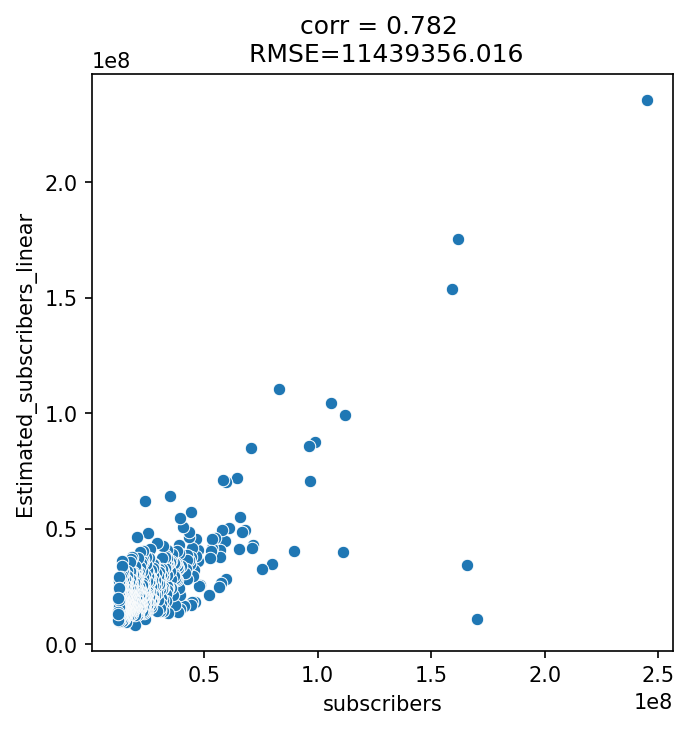

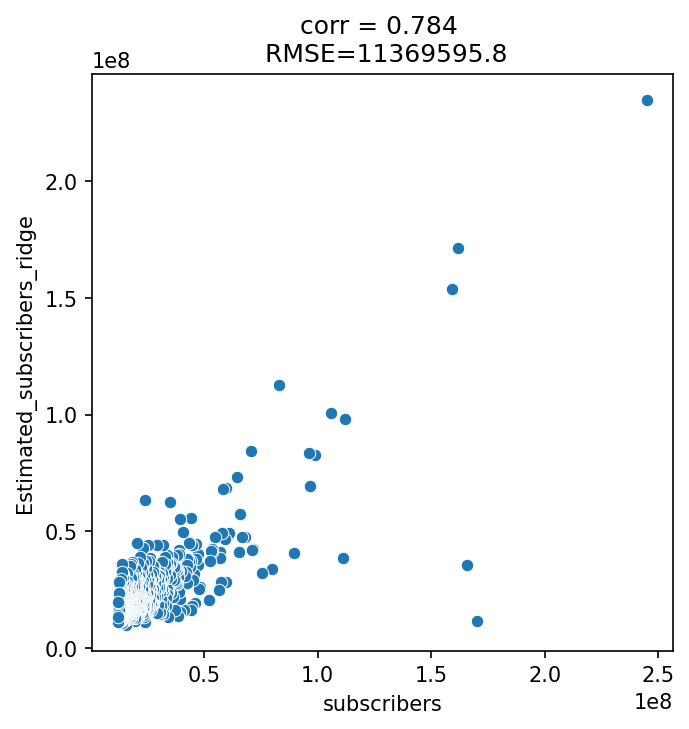

In [46]:
plot_function(df, "subscribers", "Estimated_subscribers_linear")
plot_function(df, "subscribers", "Estimated_subscribers_ridge")

# IV. Conclusion and Discussion



# Discussion


---

這次作業中，我使用Linear及ridge兩種模型來預測數據，並比較其預測結果。從數據結果可得到：  
*   Linear Regression的相關性(corr)為0.782，均方根誤差(RMSE)為11439356.016。
*   Ridge Regression的相關性(corr)為0.784，均方根誤差(RMSE)為11369595.8。

*Corr與RMSE*  
相關性(Correlation)：  
兩種模型的相關性分別為都是0.782及0.784，表示無論在linear regression或是ridge regression，兩種模型在得到數據的線性關係表現相似。相關性值接近0.8，表示模型能合理預測數據中趨勢，但我會再嘗試讓結果更進步。  
均方根誤差(RMSE)：  
ridge regression的RMSE略低於linear regression(11439356.016對比11369595.8)。這表示雖然兩種模型的預測準確性相近，但ridge regression模型稍優於linear regression模型。RMSE值較低表示ridge regression模型在預測結果上有較低的誤差。

*Ridge regression中alpha的選擇*

根據實驗結果，當alpha值為10時，預測效果優於alpha=1，而alpha=1的效果又比alpha=0.1更好。我的分析如下：  
alpha=10 能夠更好地控制參數，防止模型過度擬合，因此預測表現最佳。相較之下，alpha=1 有一定的正則化效果，但不足以完全優化模型；而 alpha=0.1 則正則化不足，導致模型過度擬合，表現較差。

*特徵標準化*  
先做特徵標準化能將不同尺度特徵轉換到相同範圍，這對於正則化方法尤為重要，原因如下：  

Ridge regression對特徵尺度敏感，他會對所有特徵的係數進行正則化，而這個正則化會受到特徵尺度的影響。如果某些特徵的範圍較大，它們的權重會被過多懲罰，而較小範圍的特徵可能幾乎不受影響，導致模型的偏差。  
由實驗結果來看，在經過特徵標準化後，效果確實進步許多。

# Conclusion

---

在這次作業中，題目為Find the top Youtubers。為了評估模型的預測效果，我們使用相關性（correlation）和均方根誤差（RMSE）這兩個指標。這兩個指標與作業題目的關係如下：

相關性（correlation）：這一指標反映模型預測與實際值之間的線性關係。綜合實驗結果，兩種模型在相關性上表現相似，均為0.782，顯示預測結果與實際數據之間有良好的線性關係。無論是使用 Ridge regression還是linear regression，模型都能得到粉絲數與特徵之間的關係，幫助我們篩選出the top YouTubers。

均方根誤差（RMSE）：RMSE則是衡量預測誤差大小的指標，數值越小表示預測越準確。在這次作業中，Ridge regression模型的RMSE為11369595.8，比linear regression模型的RMSE（11439356.016）低，表示Ridge regression在預測準確性上有較好的結果，從而提高預測粉絲數的精度。  

這些指標的結果與作業題目「Find the best YouTubers」密切相關。相關性告訴我們模型是否能抓住特徵與粉絲數之間的趨勢，而RMSE告訴我們模型在預測準確性上的表現。Ridge regression模型的RMSE較低，表明它在應對多重共線性和過擬合方面的效果較好，因此在挑選YouTubers時，可以提供更精確的粉絲數預測。

最後，期許自己在未來的研究能進一步調整Ridge regression的shrinkage penalty（如 alpha），以尋求更高的預測準確性並進一步優化模型的表現。

